Example Notebook for Persistent Topics
====================

This notebook shows how we can **(1)** run LDA on one data, **(2)** save some of the topics from the first LDA run and **(3)** use the saved topics when running LDA again on a new data.

Import stuff

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1. Initial LDA on Beer 3
---------------------------

In [2]:
# Number of topics, around 300-400 seems to be good for the beer/urine data from cross-validation results
n_topics = 300 

# How many samples to get during Gibbs sampling, recommended >500 for analysis
n_samples = 500

# No. of burn-in samples to discard before we start averaging over the samples. 
# If 0, then we'll use only the last sample for the results.
n_burn = 0 

# Thinning parameter when averaging over the samples. 
# If n_burn is 0 then this doesn't matter.
n_thin = 1 

# Follow the recommendation from Griffith & Styver
alpha = 50.0/n_topics # hyper-parameter for document-topic distributions
beta = 0.1 # hyper-parameter for topic-word distributions

In [3]:
# The input files
fragment_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_losses_rel.csv'
mzdiff_filename = None
ms1_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms2_rel.csv'

In [4]:
ms2lda = Ms2Lda.lcms_data_from_R(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                                 ms1_filename, ms2_filename)

Data shape (856, 1664)


In [5]:
ms2lda.run_lda(n_topics, n_samples, n_burn, n_thin, alpha, beta)

Fitting model...
CGS LDA initialising
......................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -3318093.318 
Sample 2   Log joint likelihood = -2208490.467 
Sample 3   Log joint likelihood = -1609922.294 
Sample 4   Log joint likelihood = -1414140.858 
Sample 5   Log joint likelihood = -1337783.834 
Sample 6   Log joint likelihood = -1295240.877 
Sample 7   Log joint likelihood = -1267716.821 
Sample 8   Log joint likelihood = -1248524.369 
Sample 9   Log joint likelihood = -1234490.592 
Sample 10   Log joint likelihood = -1224017.902 
Sample 11   Log joint likelihood = -1214830.492 
Sample 12   Log joint likelihood = -1206397.963 
Sample 13   Log joint likelihood = -1197718.346 
Sample 14   Log joint likelihood = -1192390.040 
Sample 15   Log joint likelihood = -1187082.506 
Sample 16   Log joint likelihood = -1182191.599 
Sample 17   Log joint likelihoo

Next, we save the results of this LDA on beer3 and produce the output matrices etc.

In [6]:
ms2lda.write_results('beer3_pos_rel')

Writing topics to results/beer3_pos_rel/beer3_pos_rel_topics.csv
Writing fragments x topics to results/beer3_pos_rel/beer3_pos_rel_all.csv
Writing topic docs to results/beer3_pos_rel/beer3_pos_rel_docs.csv


In [7]:
ms2lda.print_topic_words()

Topic 0: fragment_109.05257 (0.20106456044), fragment_126.05442 (0.194196428571), loss_70.04156 (0.113495879121), loss_42.04695 (0.067135989011),
Topic 1: fragment_195.11211 (0.378010573722), fragment_98.05999 (0.14597611122), fragment_167.1183 (0.121499902095), fragment_125.07087 (0.11660466027),
Topic 2: loss_197.08977 (0.728351955307), fragment_306.121 (0.0609537110934),
Topic 3: fragment_258.10964 (0.0845367027677), fragment_192.06425 (0.0755114320096), fragment_130.04926 (0.0604693140794), loss_161.06862 (0.0544524669073),
Topic 4: fragment_84.04487 (0.433774279973), loss_105.04249 (0.311537173476),
Topic 5: fragment_269.12939 (0.142308785897), fragment_193.0757 (0.0655388114871), fragment_182.0845 (0.059852146716), loss_105.05437 (0.0584304805232), fragment_206.0825 (0.0527438157521),
Topic 6: fragment_156.07692 (0.387199336467), fragment_110.07086 (0.152197954106),
Topic 7: loss_189.06336 (0.348081328751), fragment_179.03537 (0.143327605956), loss_129.04222 (0.126145475372), fra

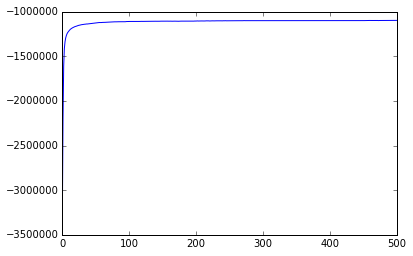

In [8]:
ms2lda.plot_log_likelihood()

And we show the ranking of the top-10 topics by their h-indices. Change the *sort_by* parameter to rank by either h-index or in-degree and remove the *top_N* parameter to show the ranking of all topics

In [9]:
# topic_ranking, sorted_topic_counts = ms2lda.rank_topics(sort_by='in_degree')
topic_ranking, sorted_topic_counts = ms2lda.rank_topics(sort_by='h_index', top_N=10)

Ranking topics ...
Topic Ranking

Topic 235 h-index=7
Topic 173 h-index=5
Topic 28 h-index=4
Topic 61 h-index=4
Topic 71 h-index=4
Topic 87 h-index=4
Topic 106 h-index=4
Topic 181 h-index=4
Topic 202 h-index=4
Topic 203 h-index=4



Plot the fragments of these topics.

Ranking topics ...
Topic Ranking

Topic 87 h-index=4
Topic 101 h-index=3
Topic 16 h-index=2
Topic 20 h-index=2
Topic 21 h-index=2
Topic 27 h-index=2
Topic 50 h-index=2
Topic 0 h-index=1
Topic 5 h-index=1
Topic 57 h-index=1

Topic 87 h-index=4

Parent peaks

     peakID	mz		rt		int		score
1    10517	180.08660	603.508		1.188e+07	2.032
2    10520	180.08657	630.413		2.820e+06	1.976
3    7776 	180.08663	565.722		2.087e+06	1.957
4    10518	180.08660	726.388		3.501e+06	1.370
5    9956 	198.09720	627.372		7.743e+06	0.565

Fragments

1    fragment_127.0387 (0.064)
 peakID  MSnParentPeakID  mz        rt       intensity
 21182    7776            127.0389  567.553  0.514576 
 23616    9956            127.0386  627.809  0.240520 
 24347   10517            127.0387  603.859  0.501848 
 24368   10518            127.0386  724.170  0.194691 
 24390   10520            127.0387  626.438  0.334838 
2    fragment_69.03368 (0.062)
 peakID  MSnParentPeakID  mz        rt       intensity
 21179    7776        

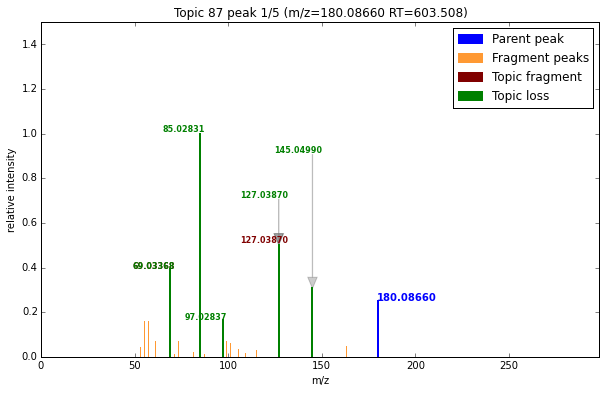

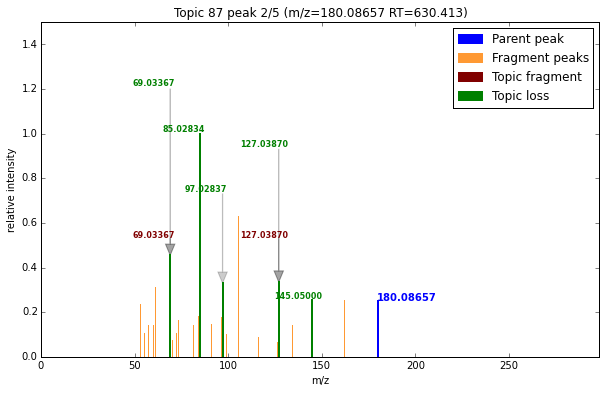

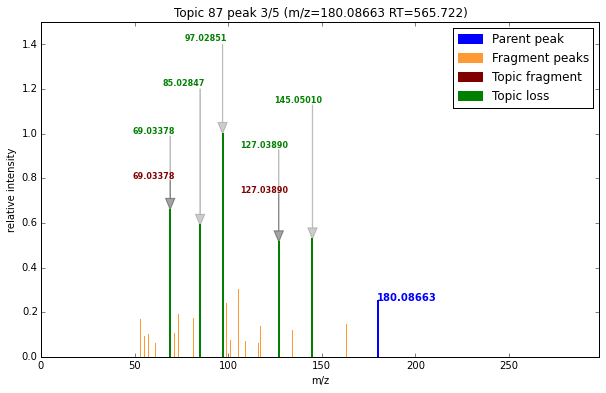

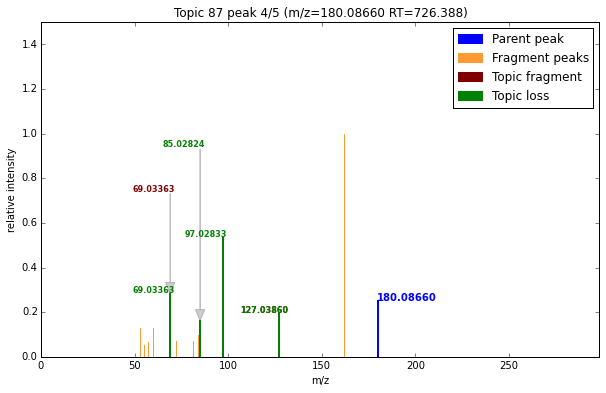

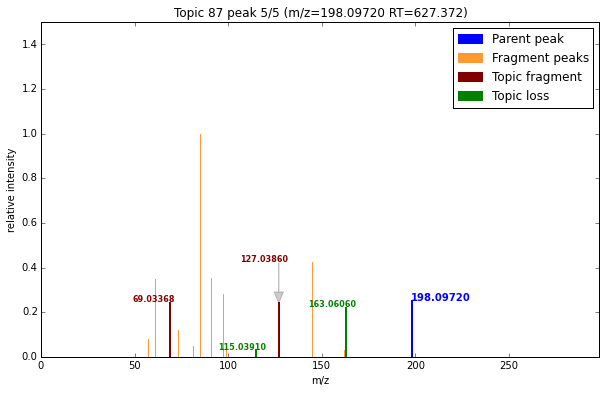

Topic 101 h-index=3

Parent peaks

     peakID	mz		rt		int		score
1    6199 	215.13902	457.696		7.871e+05	0.388
2    5097 	452.21375	419.222		9.211e+05	0.366
3    5483 	199.10775	390.305		2.520e+06	0.341
4    6441 	370.16089	491.538		9.673e+05	0.232
5    5720 	324.15534	348.358		1.048e+06	0.206
6    5721 	324.15548	417.639		1.094e+06	0.205
7    5723 	324.15548	374.230		1.094e+06	0.182
8    5724 	324.15542	452.947		7.980e+05	0.182
9    7847 	229.15463	297.637		1.477e+06	0.134
10   3821 	340.18674	290.983		3.782e+06	0.105
11   6343 	227.10254	330.420		1.193e+07	0.101
12   3427 	326.17101	297.637		1.191e+06	0.099
13   7787 	296.09899	567.280		1.017e+06	0.079
14   6060 	364.16146	465.402		1.230e+06	0.061
15   6342 	227.10254	428.854		2.783e+07	0.057

Fragments

1    fragment_181.09784 (0.241)
 peakID  MSnParentPeakID  mz          rt       intensity
 15473   3427             181.097431  295.380  0.180580 
 15806   3821             181.098079  285.741  0.141105 
 16969   5097             181

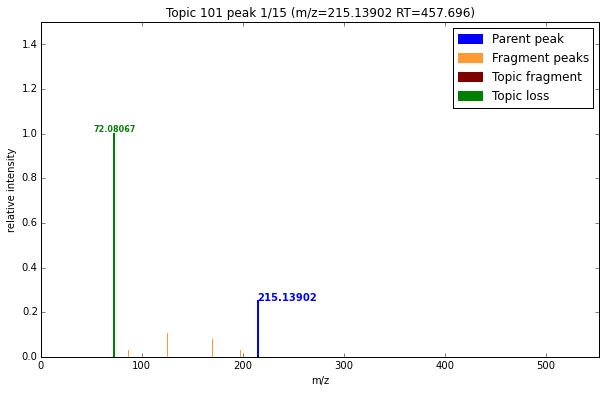

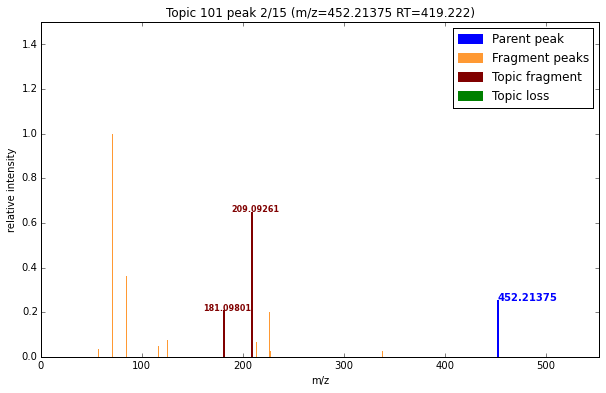

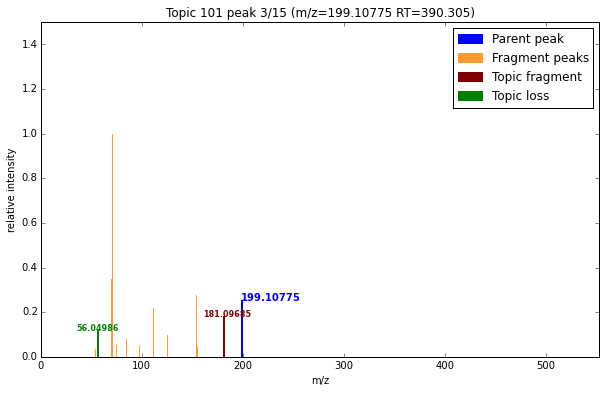

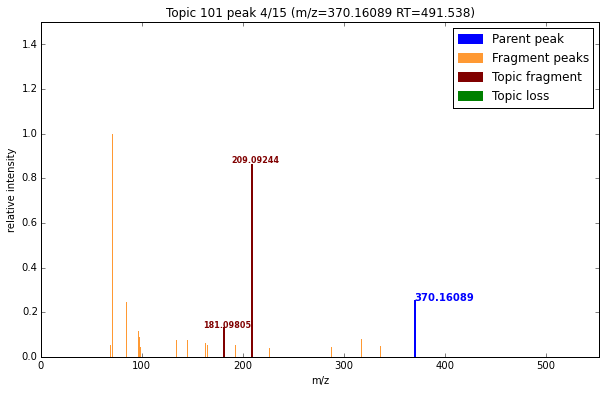

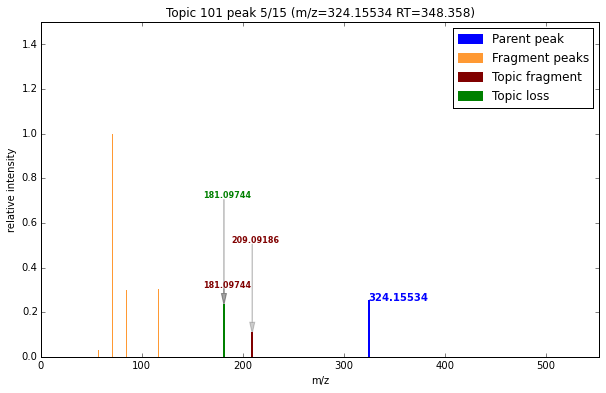

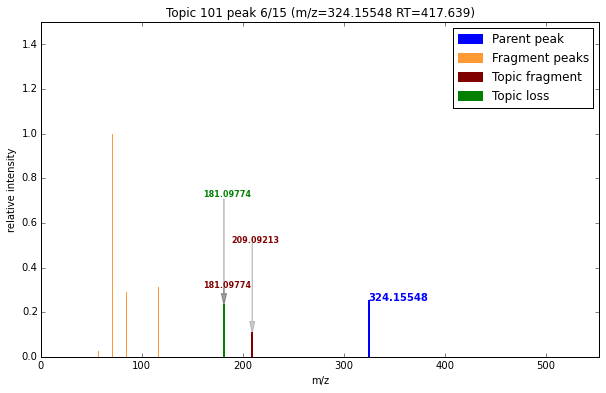

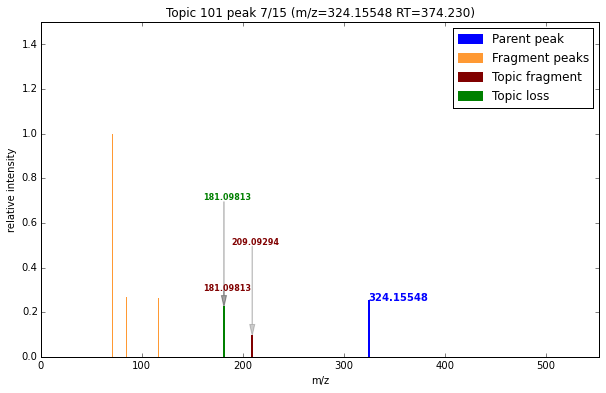

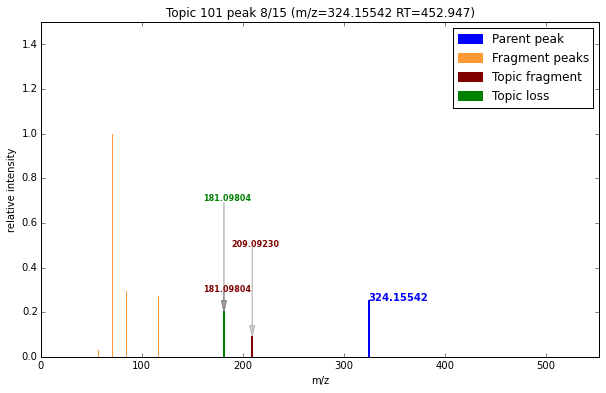

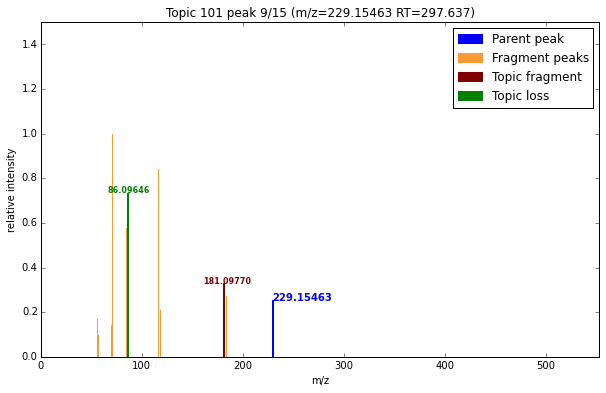

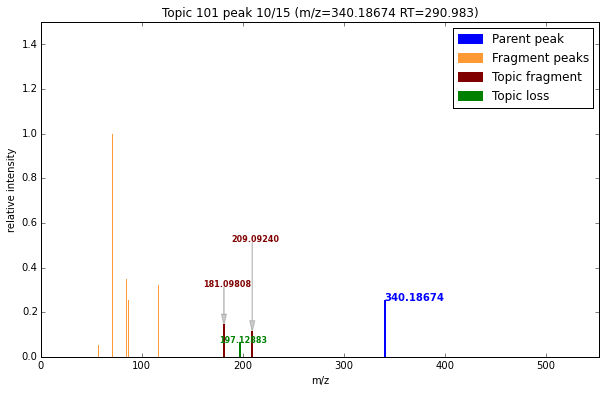

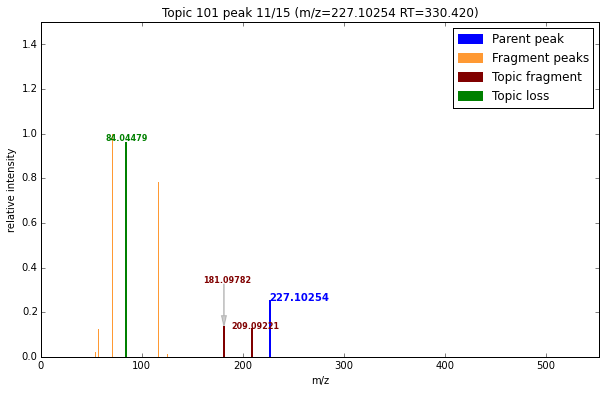

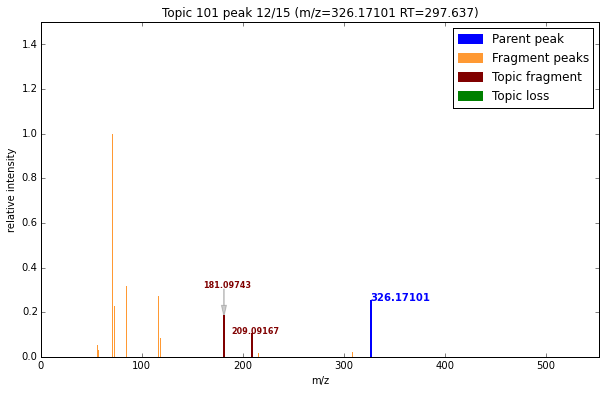

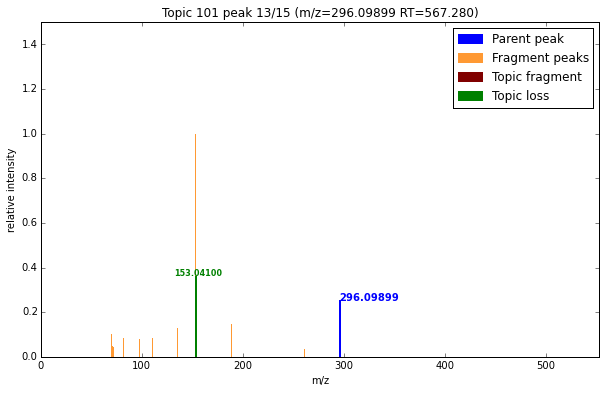

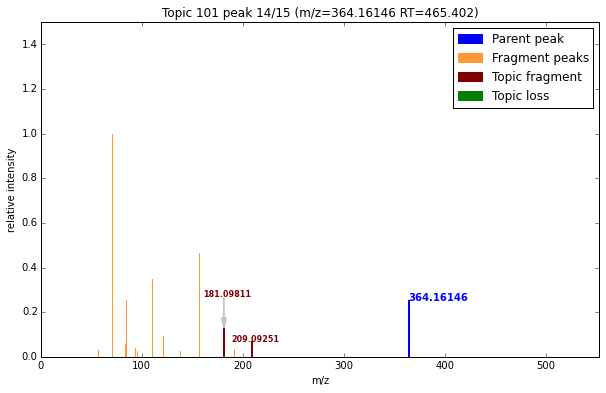

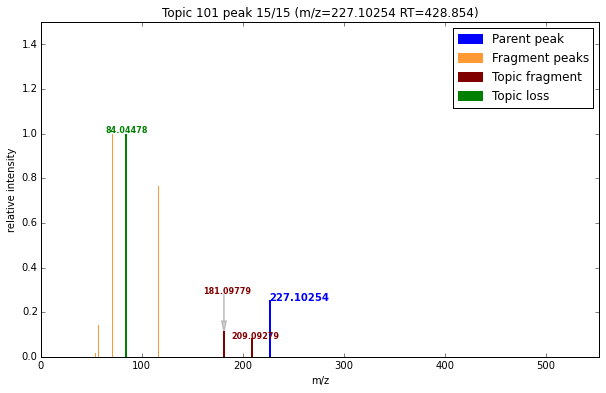

Topic 16 h-index=2

Parent peaks

     peakID	mz		rt		int		score
1    7968 	282.11815	554.431		1.383e+07	0.702
2    7626 	264.10764	552.842		2.453e+06	0.649

Fragments

1    fragment_246.09757 (0.103)
 peakID  MSnParentPeakID  mz        rt       intensity
 20849   7626             246.0976  548.944  1        
 21483   7968             246.0975  556.347  1        
2    fragment_144.06586 (0.073)
 peakID  MSnParentPeakID  mz        rt       intensity
 20850   7626             144.0660  548.944  0.855345 
 21485   7968             144.0659  556.347  0.563784 
3    fragment_56.04978 (0.063)
 peakID  MSnParentPeakID  mz        rt       intensity
 20854   7626             56.04978  548.944  0.609299 
 21484   7968             56.04977  556.347  0.607922 
4    fragment_98.05999 (0.061)
 peakID  MSnParentPeakID  mz        rt       intensity
 20851   7626             98.06006  548.944  0.694644 
 21486   7968             98.05997  556.347  0.498642 
5    fragment_186.07565 (0.055)
 peakID  MSnP

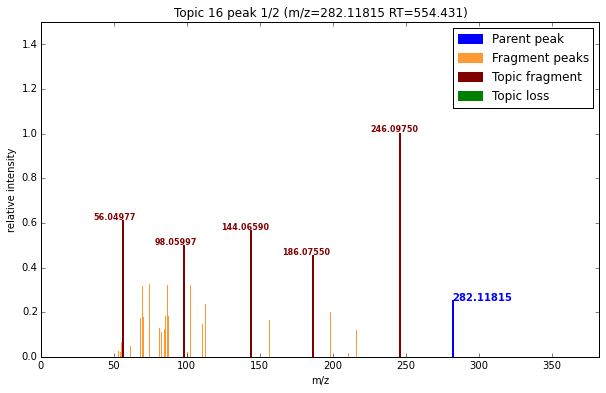

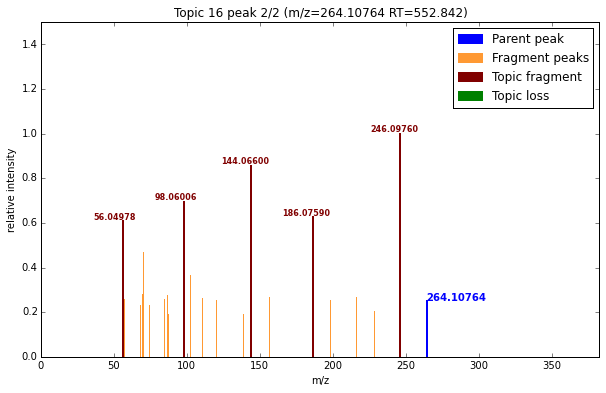

Topic 20 h-index=2

Parent peaks

     peakID	mz		rt		int		score
1    5734 	127.05023	414.504		2.761e+07	2.038
2    5974 	98.06006	390.305		1.501e+06	1.264
3    5678 	123.05532	414.504		8.612e+06	1.251
4    7117 	166.08629	290.983		6.524e+05	0.850
5    5976 	98.06005	356.523		6.332e+05	0.691
6    6667 	110.06007	380.610		8.243e+06	0.335
7    6418 	113.07092	452.947		3.020e+07	0.214
8    7704 	112.05052	552.842		1.928e+07	0.116

Fragments

1    fragment_109.04829 (0.085)
 peakID  MSnParentPeakID  mz          rt       intensity
 17832   5734             109.048302  416.351  1        
2    fragment_54.03416 (0.064)
 peakID  MSnParentPeakID  mz         rt       intensity
 17834   5734             54.034242  416.351  0.758967 

Losses

1    loss_43.00568 (0.311)
 peakID  MSnParentPeakID  mz         rt       intensity
 17713   5678             80.049471  413.286  1.000000 
 17833   5734             84.044162  416.351  0.956075 
 18174   5974             55.054714  371.981  1.000000 
 18178  

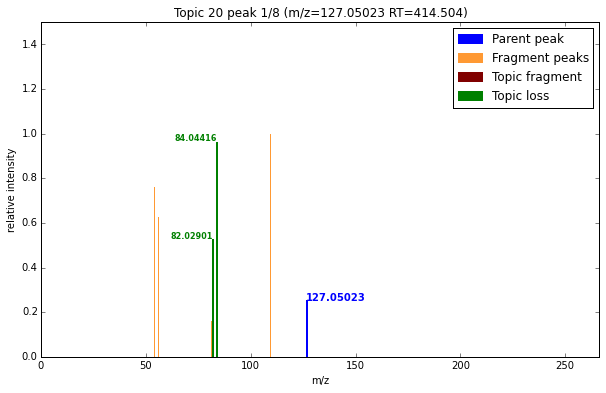

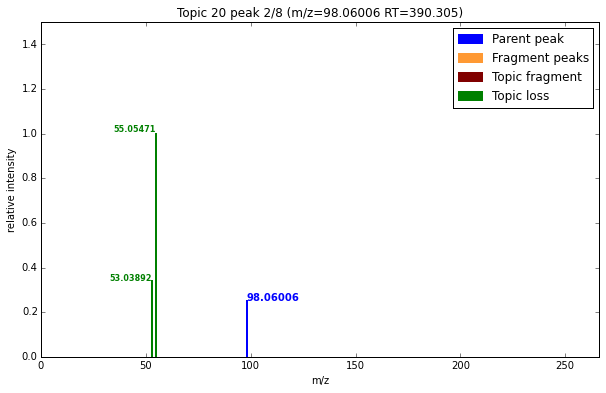

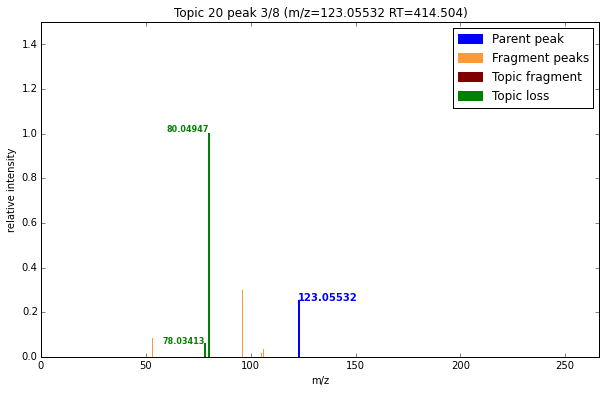

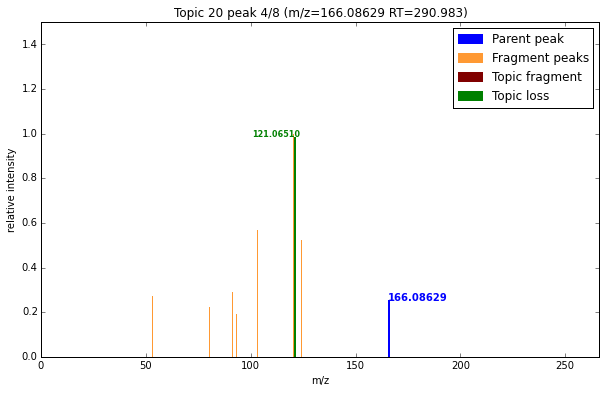

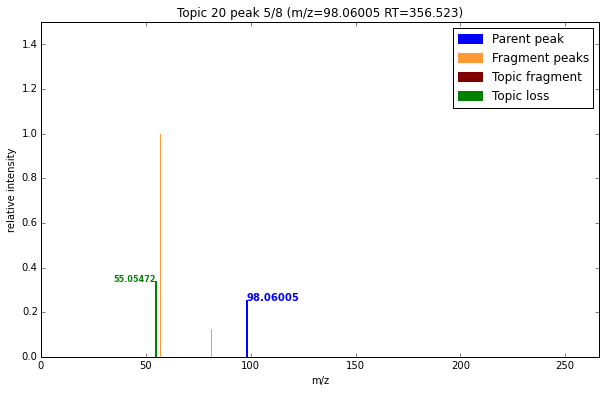

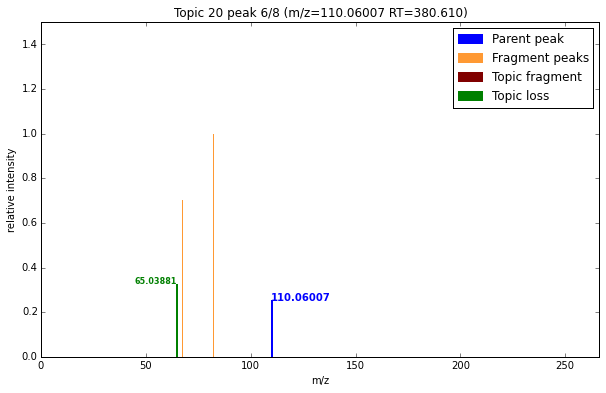

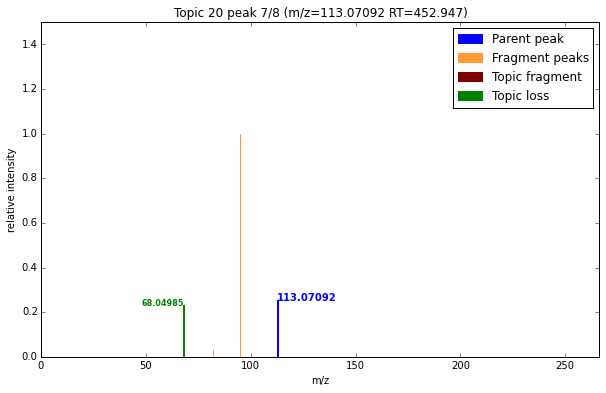

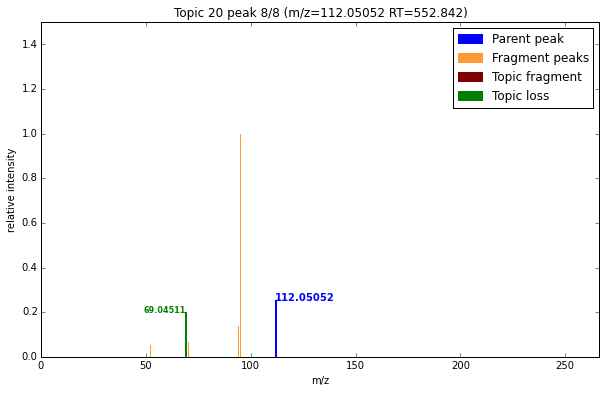

Topic 21 h-index=2

Parent peaks

     peakID	mz		rt		int		score
1    10959	189.13455	1043.000		3.090e+05	1.787
2    11380	175.11897	1050.210		9.611e+05	1.470
3    11379	175.11894	1027.770		3.669e+06	1.350
4    9232 	233.12434	703.375		2.513e+05	0.234

Fragments

1    fragment_60.0558 (0.064)
 peakID  MSnParentPeakID  mz        rt       intensity
 24903   10959            60.05578  1038.77  0.306755 
 25115   11379            60.05581  1033.00  0.248767 

Losses

1    loss_105.05437 (0.493)
 peakID  MSnParentPeakID  mz         rt        intensity
 23072    9232            128.07010   702.945  1        
 24902   10959             84.08070  1038.770  1        
 25114   11379             70.06511  1033.000  1        
 25122   11380             70.06519  1048.460  1        
2    loss_59.04757 (0.066)
 peakID  MSnParentPeakID  mz        rt       intensity
 24906   10959            130.0871  1038.77  0.249358 
 25116   11379            116.0712  1033.00  0.173599 
 25124   11380            1

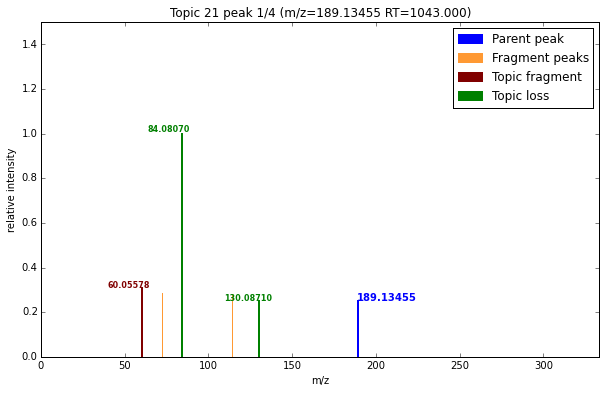

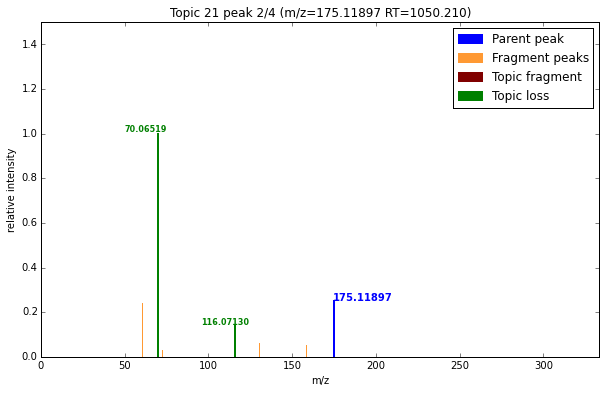

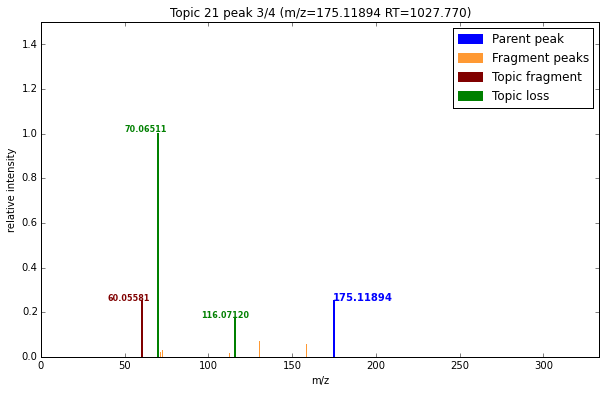

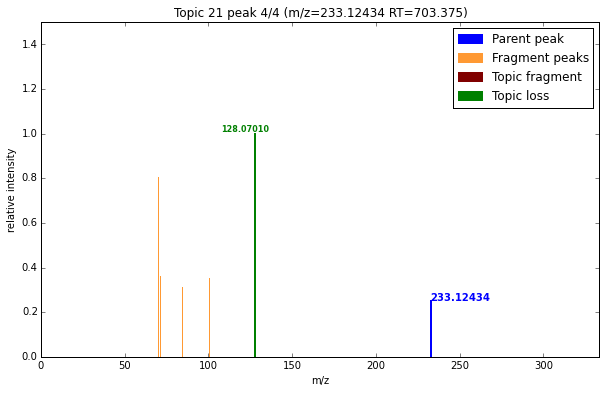

Topic 27 h-index=2

Parent peaks

     peakID	mz		rt		int		score
1    8971 	446.15175	677.129		7.945e+05	0.781
2    7787 	296.09899	567.280		1.017e+06	0.502
3    7963 	267.11969	585.875		1.540e+07	0.369

Fragments

1    fragment_152.05613 (0.410)
 peakID  MSnParentPeakID  mz        rt       intensity
 21282   7787             152.0564  563.603  1        
 21470   7963             152.0560  592.683  1        
 22928   8971             152.0562  673.914  1        
2    fragment_153.04074 (0.121)
 peakID  MSnParentPeakID  mz        rt       intensity
 21283   7787             153.0410  563.603  0.357505 
 21472   7963             153.0407  592.683  0.239134 
 22930   8971             153.0410  673.914  0.394741 
3    fragment_314.11225 (0.055)
 peakID  MSnParentPeakID  mz        rt       intensity
 22929   8971             314.1123  673.914  0.440996 

Losses




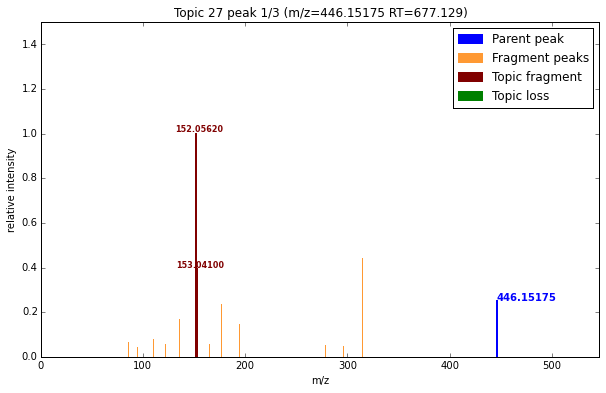

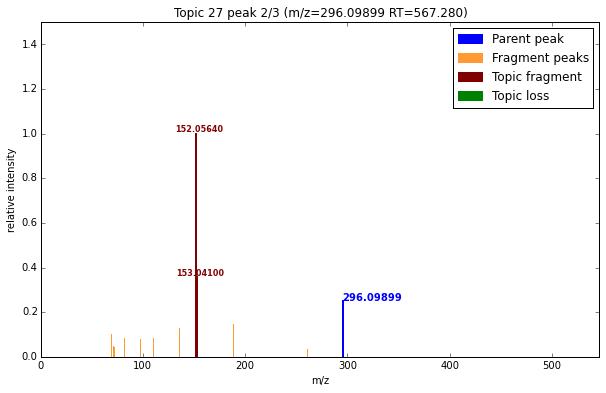

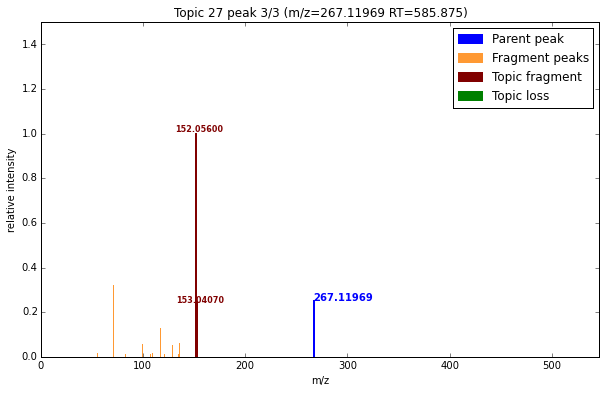

Topic 50 h-index=2

Parent peaks

     peakID	mz		rt		int		score
1    2254 	340.17556	254.771		5.694e+05	0.816
2    1674 	382.22217	231.552		6.558e+05	0.783
3    1376 	354.19100	243.181		9.973e+05	0.720
4    3210 	404.15517	295.922		1.072e+06	0.178

Fragments

1    fragment_305.13796 (0.101)
 peakID  MSnParentPeakID  mz          rt       intensity
 13692   1674             305.138452  229.059  0.391277 
 14125   2254             305.137473  252.859  1.000000 
2    fragment_347.18811 (0.073)
 peakID  MSnParentPeakID  mz          rt       intensity
 13689   1674             347.188057  229.059  1        
3    fragment_319.15178 (0.073)
 peakID  MSnParentPeakID  mz          rt       intensity
 13438   1376             319.151775  240.715  1        
4    fragment_107.08554 (0.063)
 peakID  MSnParentPeakID  mz          rt       intensity
 13442   1376             107.085651  240.715  0.291382 
 13695   1674             107.085573  229.059  0.313148 
 14128   2254             107.085462  252

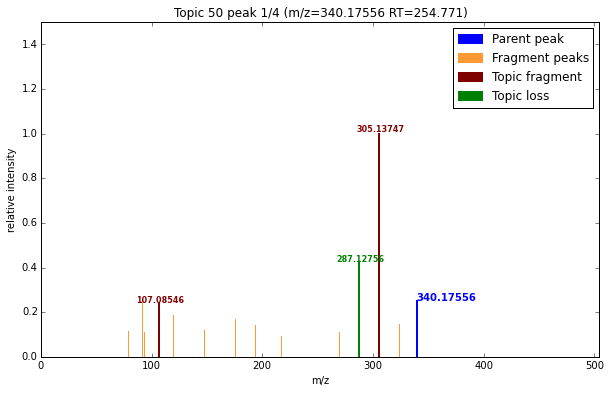

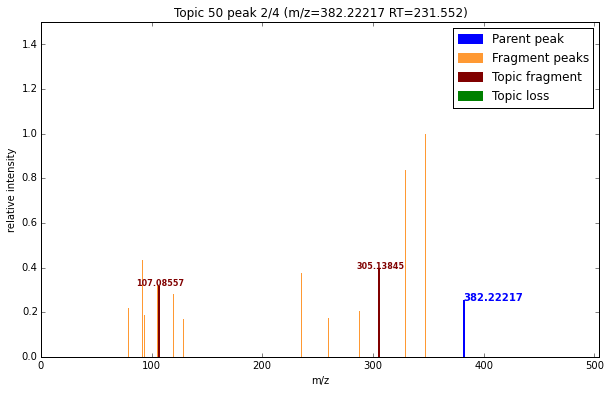

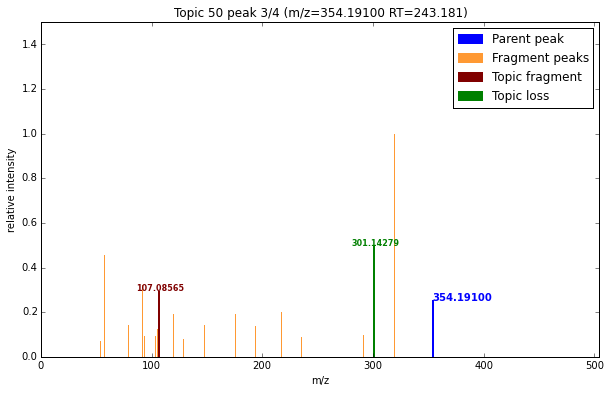

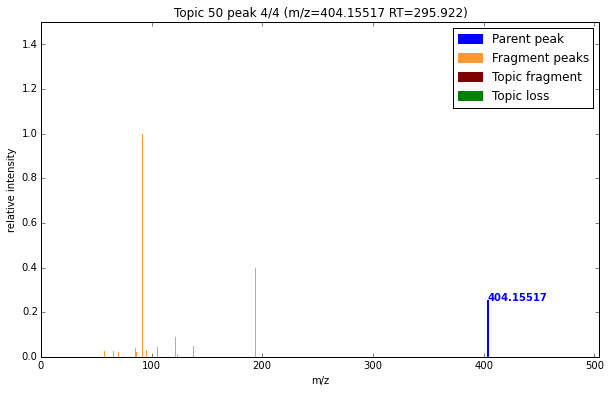

Topic 0 h-index=1

Parent peaks

     peakID	mz		rt		int		score
1    6069 	150.09138	452.947		1.461e+07	2.077
2    7054 	168.06560	451.307		7.402e+05	0.275

Fragments

1    fragment_109.05257 (0.201)
 peakID  MSnParentPeakID  mz          rt       intensity
 18396   6069             109.052658  458.052  0.817932 
 19953   7054             109.052600  460.687  0.199702 
2    fragment_126.05442 (0.194)
 peakID  MSnParentPeakID  mz          rt       intensity
 18395   6069             126.054446  458.052  1        

Losses

1    loss_70.04156 (0.113)
 peakID  MSnParentPeakID  mz         rt       intensity
 18397   6069             80.049572  458.052  0.632993 
2    loss_42.04695 (0.067)
 peakID  MSnParentPeakID  mz          rt       intensity
 18398   6069             108.044347  458.052  0.398879 



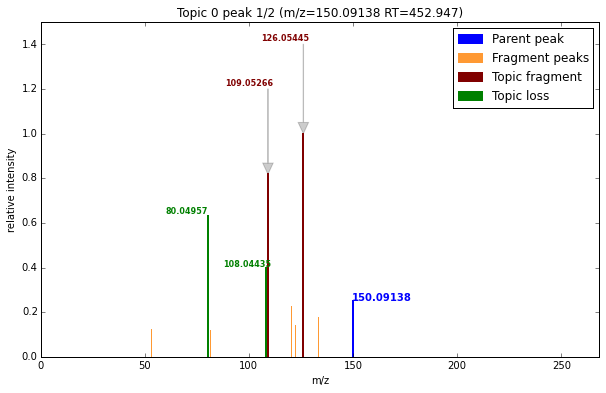

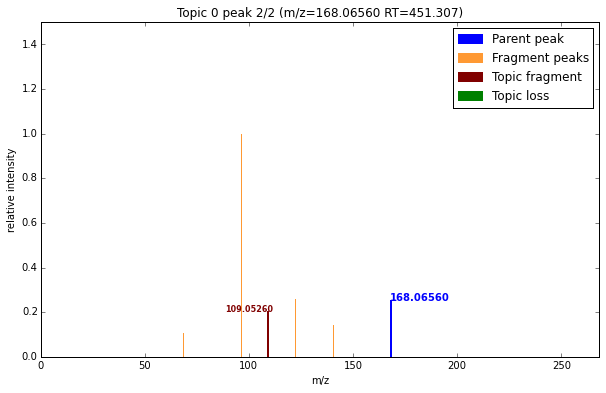

Topic 5 h-index=1

Parent peaks

     peakID	mz		rt		int		score
1    4761 	287.13889	411.438		2.518e+06	0.728

Fragments

1    fragment_269.12939 (0.142)
 peakID  MSnParentPeakID  mz          rt       intensity
 16580   4761             269.129387  412.848  1        
2    fragment_193.0757 (0.066)
 peakID  MSnParentPeakID  mz          rt       intensity
 16581   4761             193.075746  412.848  0.460317 
3    fragment_182.0845 (0.060)
 peakID  MSnParentPeakID  mz          rt       intensity
 16582   4761             182.084494  412.848  0.425449 
4    fragment_206.0825 (0.053)
 peakID  MSnParentPeakID  mz          rt       intensity
 16583   4761             206.082787  412.848  0.373541 

Losses

1    loss_105.05437 (0.058)
 peakID  MSnParentPeakID  mz          rt       intensity
 16582   4761             182.084494  412.848  0.425449 



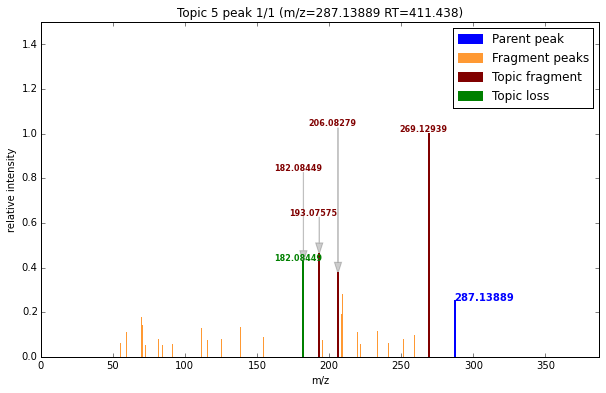

Topic 57 h-index=1

Parent peaks

     peakID	mz		rt		int		score
1    1018 	387.15665	208.697		8.009e+06	0.668
2    9816 	234.10837	813.117		1.253e+06	0.544
3    676  	513.18886	210.369		6.764e+05	0.258

Fragments

1    fragment_102.06629 (0.189)
 peakID  MSnParentPeakID  mz        rt       intensity
 23570   9816             102.0663  820.794  1        
2    fragment_263.12955 (0.189)
 peakID  MSnParentPeakID  mz          rt       intensity
 13223   1018             263.129706  201.554  1        
3    fragment_74.07118 (0.070)
 peakID  MSnParentPeakID  mz        rt       intensity
 23571   9816             74.07117  820.794  0.370886 
4    fragment_152.1059 (0.066)
 peakID  MSnParentPeakID  mz          rt       intensity
 12976   676              152.105896  209.821  0.36756  

Losses

1    loss_160.0369 (0.070)
 peakID  MSnParentPeakID  mz        rt       intensity
 23571   9816             74.07117  820.794  0.370886 



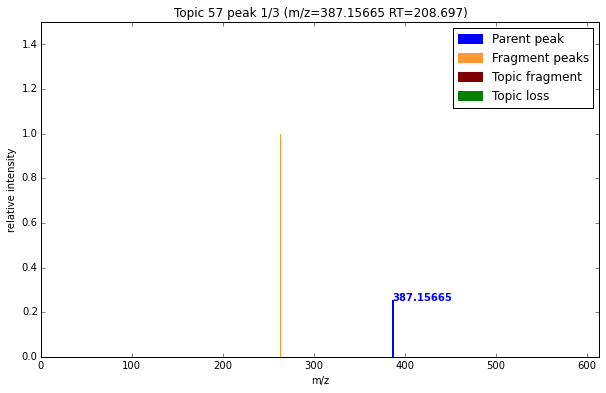

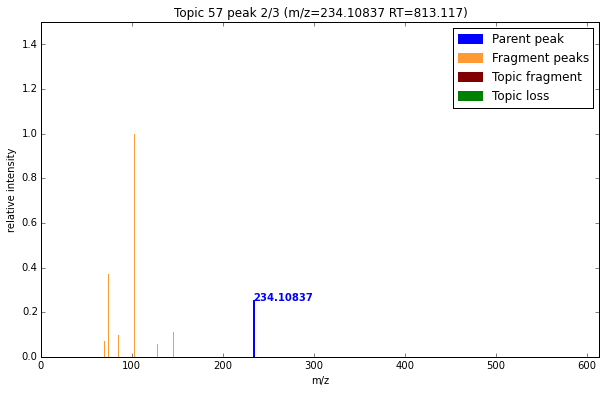

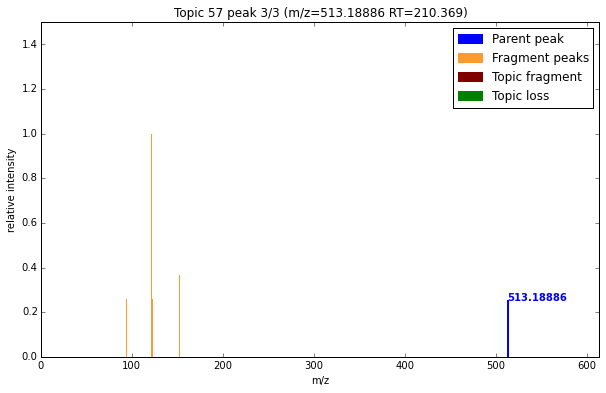

In [10]:
persisted_topics  = [57, 87, 16, 50, 101, 0, 5, 20, 21, 27]

# Non-interactive visualisation
# Remove the 'selected_topics' parameter to make the plots for all topics.
# You can sort by either 'h_index' or 'in_degree'.
ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index", selected_topics=persisted_topics)

# uncomment below for interactive visualisation
# ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index", interactive=True)

Let's say we want to set all the top-10 topics from beer3pos above (or whatever defined in the *persisted_topics* variable) and run the LDA using them again on beer2.

First we need to save the state of the LDA model that we just ran on  beer3pos. Below line will create two more files: the dumped model state (*beer3pos.model*) and the list of vocabularies of the 'words' used for the persisted topics (*beer3pos.vocab*). These files are written to the same location as the output matrices, i.e. in the *results/beer3_pos_rel* folder relative to this notebook.

In [11]:
model_filename = 'results/beer3_pos_rel/beer3pos.model'
vocab_filename = 'results/beer3_pos_rel/beer3pos.vocab'
ms2lda.save_model(persisted_topics, model_filename, vocab_filename)

Model saved to results/beer3_pos_rel/beer3pos.model
Words written to results/beer3_pos_rel/beer3pos.vocab


2. LDA on Beer2 with persistent topics from Beer3
------------------------------------------------------

First we load the previously saved model of beer3.

In [12]:
from lda_cgs import CollapseGibbsLda
beer3_model = CollapseGibbsLda.load(model_filename)
if hasattr(beer3_model, 'selected_topics'):
    print "Persistent topics = " + str(beer3_model.selected_topics)

Model loaded from results/beer3_pos_rel/beer3pos.model
Persistent topics = [57, 87, 16, 50, 101, 0, 5, 20, 21, 27]


Now we have to go to R and run the feature extraction script (*MS1MS2_MatrixGeneration_default_7ppm_specPeaks.R*) on the Beer2pos data. <font color='red'>**This step has to be manually done for now .. although we should automate it as part of the pipeline later.**</font>

Specifically in the R script, set the following parameter (that specifies the vocabulary list of the persistent topics)

    prev_words_file <- '/home/joewandy/git/metabolomics_tools/justin/notebooks/results/beer3_pos_rel/beer3pos.vocab'

and re-run sections in the R-script that does feature extractions .. from the "Data filtering" part onwards.

<hr/>

When running the LDA on beer2pos, there's now the additional parameter *previous_model* that needs to be passed in. Also, the total number of topics are now 135. The persistent topics (10) come first, and the remaining new topics (300) are appended after them. 

In [13]:
# Number of NEW topics. The total number of topics is actually 10 (previous) + 300 (new) = 310. 
n_topics = 300 

# How many samples to get during Gibbs sampling, recommended >500 for analysis
n_samples = 500

# No. of burn-in samples to discard before we start averaging over the samples. 
# If 0, then we'll use only the last sample for the results.
n_burn = 0 

# Thinning parameter when averaging over the samples. 
# If n_burn is 0 then this doesn't matter.
n_thin = 1 

# Follow the recommendation from Griffith & Styver
total_no_of_topics = n_topics + len(beer3_model.selected_topics)
alpha = 50.0/total_no_of_topics # hyper-parameter for document-topic distributions
beta = 0.1 # hyper-parameter for topic-word distributions

In [14]:
fragment_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_losses_rel.csv'
mzdiff_filename = None
ms1_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_2_T10_POS_ms2_rel.csv'

ms2lda = Ms2Lda.lcms_data_from_R(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                                 ms1_filename, ms2_filename)
ms2lda.run_lda(n_topics, n_samples, n_burn, n_thin, alpha, beta, previous_model=beer3_model)

Data shape (935, 2002)
Fitting model...
CGS LDA initialising
Total no. of topics = 310
..............................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -4014979.392 
Sample 2   Log joint likelihood = -2709938.865 
Sample 3   Log joint likelihood = -1999706.993 
Sample 4   Log joint likelihood = -1760761.020 
Sample 5   Log joint likelihood = -1664361.931 
Sample 6   Log joint likelihood = -1612336.771 
Sample 7   Log joint likelihood = -1577900.022 
Sample 8   Log joint likelihood = -1552305.211 
Sample 9   Log joint likelihood = -1534809.501 
Sample 10   Log joint likelihood = -1517826.141 
Sample 11   Log joint likelihood = -1503476.735 
Sample 12   Log joint likelihood = -1492945.112 
Sample 13   Log joint likelihood = -1484906.665 
Sample 14   Log joint likelihood = -1477979.528 
Sample 15   Log joint likelihood = -1472105.514 
Sample 16   Log joint l

In [15]:
ms2lda.write_results('beer2_pos_rel')

Writing topics to results/beer2_pos_rel/beer2_pos_rel_topics.csv
Writing fragments x topics to results/beer2_pos_rel/beer2_pos_rel_all.csv
Writing topic docs to results/beer2_pos_rel/beer2_pos_rel_docs.csv


3. Beer2 Results
------------------

The persisted topics from previous LDA run are placed first in list of topics of the new LDA run, so so old topic 57 becomes new topic 0, old topic 87 is new topic 1, etc.

In [16]:
old_persisted_index = beer3_model.selected_topics
new_persisted_index = range(len(beer3_model.selected_topics))

print "in beer3pos = " + str(old_persisted_index)
print "in beer2pos = " + str(new_persisted_index)

in beer3pos = [57, 87, 16, 50, 101, 0, 5, 20, 21, 27]
in beer2pos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


If we show the ranking of the top-10 topics in beer2pos by the H-index, we see that the persisted topics from beer3 aren't very high up the list, i.e. we don't see topics 0 - 9 there.

In [17]:
topic_ranking, sorted_topic_counts = ms2lda.rank_topics(sort_by='h_index', top_N=10)

Ranking topics ...
Topic Ranking

Topic 204 h-index=8
Topic 185 h-index=6
Topic 48 h-index=5
Topic 133 h-index=5
Topic 159 h-index=5
Topic 163 h-index=5
Topic 124 h-index=4
Topic 201 h-index=4
Topic 220 h-index=4
Topic 234 h-index=4



We can also plot the fragments in topics 0 - 9 in beer2pos.

Ranking topics ...
Topic Ranking

Topic 0 h-index=0
Topic 1 h-index=0
Topic 2 h-index=0
Topic 3 h-index=0
Topic 4 h-index=0
Topic 5 h-index=0
Topic 6 h-index=0
Topic 7 h-index=0
Topic 8 h-index=0
Topic 9 h-index=0

Topic 0 h-index=0

No parent peaks above the threshold found for this topic
Topic 1 h-index=0

No parent peaks above the threshold found for this topic
Topic 2 h-index=0

No parent peaks above the threshold found for this topic
Topic 3 h-index=0

No parent peaks above the threshold found for this topic
Topic 4 h-index=0

No parent peaks above the threshold found for this topic
Topic 5 h-index=0

No parent peaks above the threshold found for this topic
Topic 6 h-index=0

No parent peaks above the threshold found for this topic
Topic 7 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    10049	363.18440	788.931		1.331e+06	0.064

Fragments

1    fragment_91.03921 (0.080)
	Nothing found for the selected parent peaks

Losses




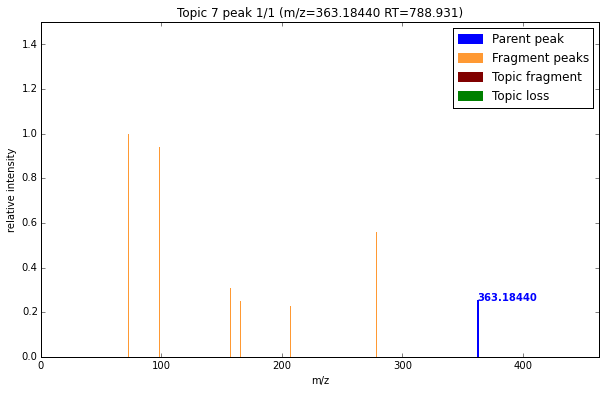

Topic 8 h-index=0

No parent peaks above the threshold found for this topic
Topic 9 h-index=0

Parent peaks

     peakID	mz		rt		int		score
1    4810 	146.05998	411.348		2.877e+06	0.431

Fragments


Losses




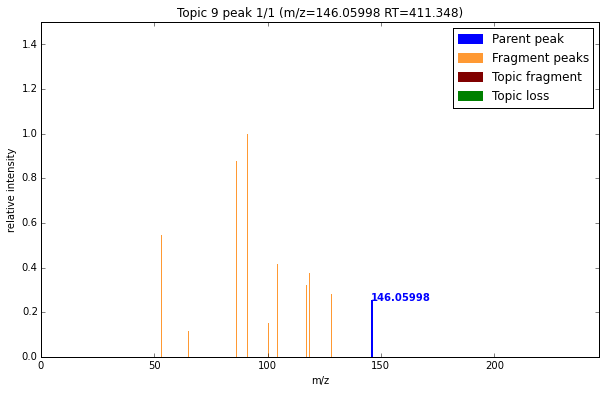

In [18]:
# non-interactive
ms2lda.plot_lda_fragments(consistency=0.0, sort_by="h_index", selected_topics=new_persisted_index)

# interactive
# ms2lda.plot_lda_fragments(consistency=0.0, sort_by="h_index", interactive=True)

We can also plot of the predictive distribution of the persisted topics (theta) in the old and new LDA results

In [19]:
pred_old = beer3_model.posterior_alpha
pred_old = pred_old / np.sum(pred_old)
pred_old = pred_old[old_persisted_index]
print pred_old

beer2_model = ms2lda.model
pred_new = beer2_model.posterior_alpha
pred_new = pred_new / np.sum(pred_new)
pred_new = pred_new[new_persisted_index]
print pred_new

[ 0.00046983  0.00204258  0.00156633  0.00156856  0.0036519   0.00156735
  0.00062536  0.00300238  0.00125531  0.00109843]
[ 0.00158992  0.00066191  0.00092697  0.00026464  0.00039732  0.00066178
  0.00052936  0.00199291  0.0001323   0.00106201]


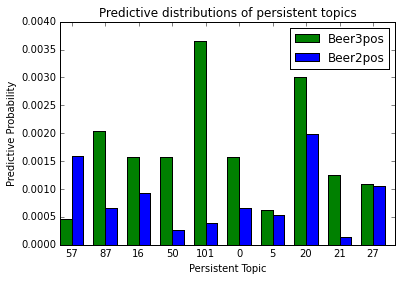

In [20]:
K = len(old_persisted_index)
ind = np.arange(K)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, pred_old, width, color='g')
rects2 = ax.bar(ind+width, pred_new, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Predictive Probability')
ax.set_xlabel('Persistent Topic')
ax.set_title('Predictive distributions of persistent topics')
ax.set_xticks(ind+width)
ax.set_xticklabels(old_persisted_index)

ax.legend( (rects1[0], rects2[0]), ('Beer3pos', 'Beer2pos') )
plt.show()